In [4]:
#Pkg.update("LowRankModels")
using LowRankModels, PyPlot, DataFrames

# Input the Data

In [5]:
y = readtable("C:/Users/Eason/Downloads/winedatajulia.csv")[1]
X = convert(Array,readtable("C:/Users/Eason/Downloads/winedatajulia.csv")[2:120])

S}

129963×119 Array{Float64,2}:
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0   3.0  0.135  0.865  0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   0.0  0.142  0.858  0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   2.0  0.03   0.97   0.0  
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   1.0  0.076  0.924  0.0  
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   5.0  0.177  0.823  0.0  
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0   0.0  0.07   0.93   0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   0.0  0.074  0.926  0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   0.0  0.103  0.858  0.04 
 0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  1.0   4.0  0.266  0.734  0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   0.0  0.089  0.911  0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0   4.0  0.078  0.922  0.0  
 0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  1.0   2.0  0.087  0.887  0.027
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   5.0  0.177  0.823  0.

, Base

# Run some regressions

In [6]:
function prox_k_sparse_gradient_method(X, y ,w , alpha, iterations=100)
    
    obj_store = zeros(0)
    for i = 1:(iterations)
        z = w - alpha*2*(X'*X*w-X'y)
        w = prox_k_sparse(z,k)
        append!(obj_store,(norm(X*w-y)).^2)
    end
    
    return w,obj_store
end

.Nullable{T}) in module Base

prox_k_sparse_gradient_method (generic function with 2 methods)

In [7]:
function prox_k_sparse(z,k)
    
    set_to_zero_order = sortperm(abs.(z))
    d = length(z)
    w = z
    for i = 1:d-k
        w[set_to_zero_order[i]] = 0
    end
    
    return w
end

 at nullable.jl:238 overwritten

prox_k_sparse (generic function with 1 method)

In [8]:
Lipshitz = 2*maximum(svdvals(X)).^2

alpha = (1/Lipshitz)/4

 in module NullableArrays at C:\Users\Eason\.julia\v0.6\NullableArrays\src\operators.jl:99.


6.660954578663773e-8

In [9]:
size(X)[2]

119

The minimum objective value is 

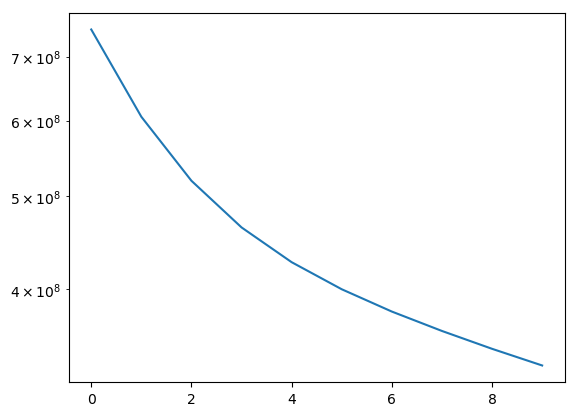

3.3274778814644676e8

In [15]:
w_rand = randn(size(X)[2])
k = 50
w, obj_output = prox_k_sparse_gradient_method(X, y, w_rand, alpha, 10)
semilogy(obj_output)
print("The minimum objective value is ",minimum(obj_output))

In [10]:
function stochastic_prox_grad_method(X, y ,w , alpha, iterations=100)
    alphai=alpha/8
    obj_store = zeros(0)
    for j = 1:(iterations)
        i = Integer(ceil(rand()*length(y)))
        yi = y[i]
        xi = X[i,:]
        z = w + alphai*(2*length(y)*((yi-w'*xi)*xi))
        w = prox_k_sparse(z,k)
        append!(obj_store,(norm(X*w-y)).^2)
    end
    
    return w,obj_store
end

stochastic_prox_grad_method (generic function with 2 methods)

8

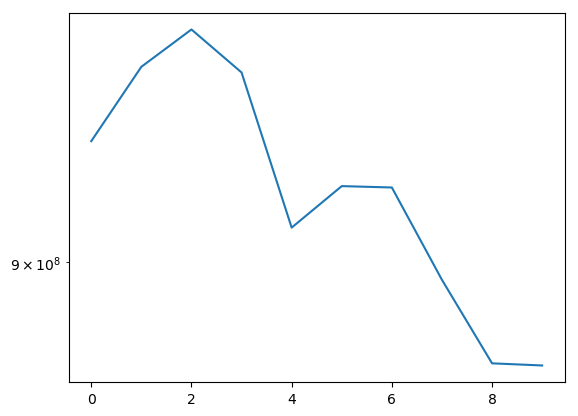

.759157661083764e8

In [16]:
w_rand = randn(size(X)[2])
w,obj_output = stochastic_prox_grad_method(X, y, w_rand, alpha, 10)

semilogy(obj_output)

print(minimum(obj_output))

In [11]:
# proximal gradient method
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [12]:
# proximal gradient method
function proxgrad(loss::Loss, reg::Regularizer, X, y;
                  maxiters::Int = 10, stepsize::Number = 1., 
                  ch::ConvergenceHistory = ConvergenceHistory("proxgrad"))
    w = zeros(size(X,2))
    for t=1:maxiters
        t0 = time()
        # gradient step
        g = grad(loss, X, w, y)
        w = w - stepsize*g
        # prox step
        w = prox(reg, w, stepsize)
        # record objective value
        update_ch!(ch, time() - t0, obj = evaluate(loss, X, w, y) + evaluate(reg, w))
    end
    return w
end

proxgrad (generic function with 2 methods)

In [ ]:
n = length(y)
ch = ConvergenceHistory("proxgrad")

w_huber = proxgrad(1/n*HuberLoss(), NonNegConstraint(), X, y, stepsize=.1, maxiters=100, ch=ch)

plot(ch.objective)
xlabel("iteration")
ylabel("objective")

In [ ]:
for i in 1:length(y)
   println((X*w_huber)[i], " vs ", y[i]) 
end

In [22]:
function R2_score(y_pred, y_true)
   u = sum(((y_true-y_pred).^2))
   v = sum((y_true-mean(y_true)).^2)
   return 1-(1.0*u/v)
end

R2_score (generic function with 1 method)

In [23]:
R2_score(X*w_huber,y)

-614.3922437929652

In [50]:
function lasso(X,y; λ=1, kwargs...)
    w = proxgrad(QuadLoss(), λ*OneReg(), X, y; kwargs...)
    return w
end

function nnls(X,y; kwargs...)
    w = proxgrad(QuadLoss(), NonNegConstraint(), X, y; kwargs...)
    return w
end

function ridge_regression(X,y; λ=1, kwargs...)
    w = proxgrad(QuadLoss(), λ*QuadReg(), X, y; kwargs...)
    return w
end

ridge_regression (generic function with 1 method)

In [98]:
maxiters = 50
stepsize = .01/norm(X)

w_ridge = ridge_regression(X,y, maxiters=maxiters, stepsize=alpha/1)
w_nonneg = nnls(X,y, maxiters=maxiters, stepsize=alpha/1)
w_lasso = lasso(X,y, maxiters=maxiters, stepsize=alpha/1)
println(w_ridge)
println(w_nonneg)
println(w_lasso)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] sumabs2(::Array{Float64,1}) at .\deprecated.jl:57
 [3] evaluate at C:\Users\Eason\.julia\v0.6\LowRankModels\src\regularizers.jl:57 [inlined]
 [4] #proxgrad#39(::Int64, ::Float64, ::LowRankModels.ConvergenceHistory, ::Function, ::LowRankModels.QuadLoss, ::LowRankModels.QuadReg, ::Array{Float64,2}, ::DataArrays.DataArray{Float64,1}) at .\In[43]:14
 [5] (::#kw##proxgrad)(::Array{Any,1}, ::#proxgrad, ::LowRankModels.QuadLoss, ::LowRankModels.QuadReg, ::Array{Float64,2}, ::DataArrays.DataArray{Float64,1}) at .\<missing>:0
 [6] #ridge_regression#42(::Int64, ::Array{Any,1}, ::Function, ::Array{Float64,2}, ::DataArrays.DataArray{Float64,1}) at .\In[50]:12
 [7] (::#kw##ridge_regression)(::Array{Any,1}, ::#ridge_regression, ::Array{Float64,2}, ::DataArrays.DataArray{Float64,1}) at .\<missing>:0
 [8] include_string(::String, ::String) at .\loading.jl:515
 [9] include_string(::Module, ::String, ::String) at C:\Users\Eason\.jul

[10.851, 1.81683, 3.44961, 3.45755, 0.878931, 1.32135, 1.24561, 0.905518, 0.123237, 0.425013, 0.135045, 1.34244, 0.598435, 0.590795, 2.33564, 0.0612986, 1.30963, 2.63994, 0.0316187, 0.0188262, 2.72455, 0.596878, 0.707636, 0.564616, 0.183023, 1.13436, 0.278962, 0.627251, 0.0974905, 1.95657, 0.0380661, 0.17381, 1.23066, 0.0372777, 0.445027, 0.271054, 0.325567, 0.0574197, 0.0631236, 0.0206914, 0.273316, 0.0526096, 0.250273, 0.264952, 0.525354, 0.0782593, 0.699267, 0.0220078, 0.182625, 0.135947, 0.336645, 0.120461, 0.192656, 0.965513, 0.0377533, 0.032389, 0.0250913, 0.191746, 0.956426, 0.0337426, 0.0353727, 0.14386, 0.0471839, 0.0346997, 0.0509262, 0.0217288, 0.18635, 0.0627015, 0.0512343, 0.222297, 0.0442857, 0.0215699, 0.0642554, 0.101078, 0.0490987, 0.0151045, 0.0973447, 0.0254872, 0.0492118, 0.0254034, 0.492185, 0.203485, 0.0910929, 0.128404, 0.014511, 0.0335291, 0.0366743, 0.184457, 0.0579811, 0.027574, 0.020451, 0.0274732, 0.0831177, 0.0506277, 0.0271748, 0.0212353, 0.0171929, 0.0878

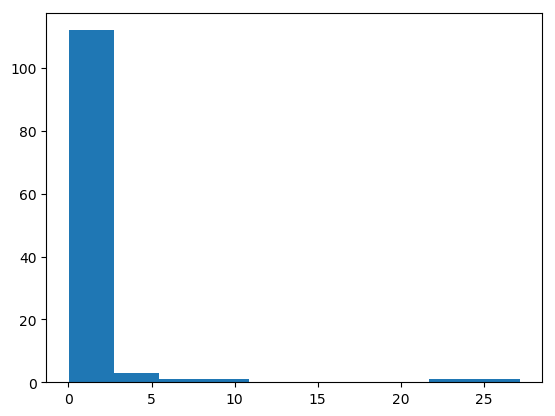

([112.0, 3.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0], [0.0138484, 2.7266, 5.43935, 8.15209, 10.8648, 13.5776, 16.2903, 19.0031, 21.7158, 24.4286, 27.1413], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x000000007D700400>, PyObject <matplotlib.patches.Rectangle object at 0x000000007D700208>, PyObject <matplotlib.patches.Rectangle object at 0x000000007D7006A0>, PyObject <matplotlib.patches.Rectangle object at 0x000000007D7009E8>, PyObject <matplotlib.patches.Rectangle object at 0x000000007D700CC0>, PyObject <matplotlib.patches.Rectangle object at 0x000000007D700FD0>, PyObject <matplotlib.patches.Rectangle object at 0x000000007D70D320>, PyObject <matplotlib.patches.Rectangle object at 0x000000007D70D630>, PyObject <matplotlib.patches.Rectangle object at 0x000000007D70D940>, PyObject <matplotlib.patches.Rectangle object at 0x000000007D70DC50>])

In [99]:
PyPlot.plt[:hist](w_ridge)

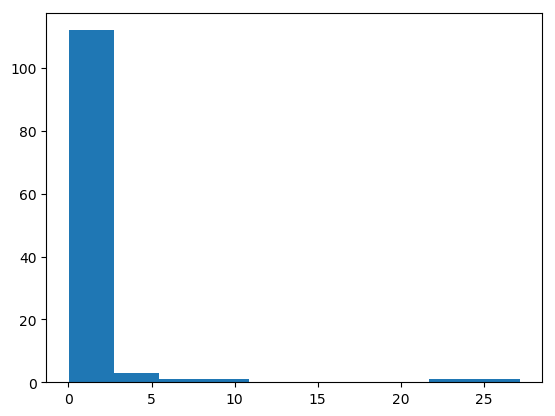

([112.0, 3.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0], [0.0138452, 2.7266, 5.43936, 8.15211, 10.8649, 13.5776, 16.2904, 19.0031, 21.7159, 24.4287, 27.1414], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x000000007E80A2E8>, PyObject <matplotlib.patches.Rectangle object at 0x000000007E80A0F0>, PyObject <matplotlib.patches.Rectangle object at 0x000000007E80A588>, PyObject <matplotlib.patches.Rectangle object at 0x000000007E80A8D0>, PyObject <matplotlib.patches.Rectangle object at 0x000000007E80ABA8>, PyObject <matplotlib.patches.Rectangle object at 0x000000007E80AEB8>, PyObject <matplotlib.patches.Rectangle object at 0x000000007E819208>, PyObject <matplotlib.patches.Rectangle object at 0x000000007E819518>, PyObject <matplotlib.patches.Rectangle object at 0x000000007E819828>, PyObject <matplotlib.patches.Rectangle object at 0x000000007E819B38>])

In [100]:
PyPlot.plt[:hist](w_lasso)

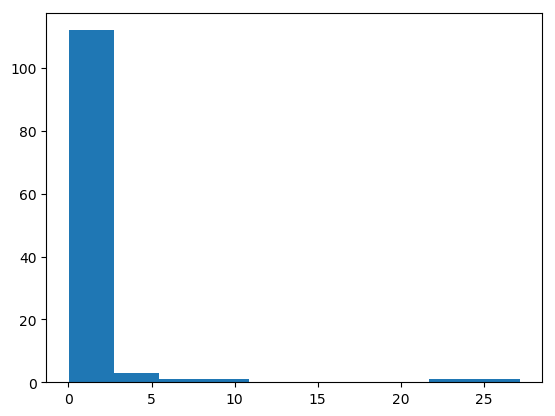

([112.0, 3.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0], [0.0138485, 2.7266, 5.43936, 8.15212, 10.8649, 13.5776, 16.2904, 19.0031, 21.7159, 24.4287, 27.1414], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x000000007CA55C18>, PyObject <matplotlib.patches.Rectangle object at 0x000000007CA55A20>, PyObject <matplotlib.patches.Rectangle object at 0x000000007CA55EB8>, PyObject <matplotlib.patches.Rectangle object at 0x000000007CA63240>, PyObject <matplotlib.patches.Rectangle object at 0x000000007CA63518>, PyObject <matplotlib.patches.Rectangle object at 0x000000007CA63828>, PyObject <matplotlib.patches.Rectangle object at 0x000000007CA63B38>, PyObject <matplotlib.patches.Rectangle object at 0x000000007CA63E48>, PyObject <matplotlib.patches.Rectangle object at 0x000000007CA71198>, PyObject <matplotlib.patches.Rectangle object at 0x000000007CA714A8>])

In [101]:
PyPlot.plt[:hist](w_nonneg)

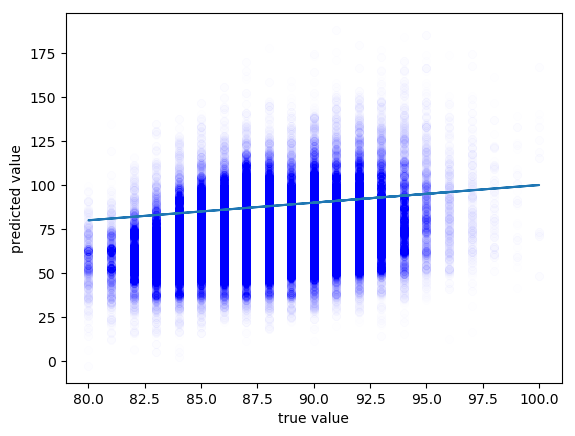

PyObject Text(24,0.5,u'predicted value')

In [102]:
# which fits data best?
scatter(y,X*w_ridge,label="ridge",alpha=0.002, color="blue")
#scatter(y,X*w_lasso,label="lasso",alpha=0.01,color="green")
#scatter(y,X*w_nonneg,label="NNLS",alpha=0.2,color="red")
plot(y,y,label="true model")
xlabel("true value")
ylabel("predicted value")